In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np

from salishsea_tools.nc_tools import scDataset

%matplotlib inline

# Loading files

I applied the sorting after the gethourlyfiles function because the date is in the filename (as opposed to dirname). I wasn't sure how to modify the loop to make it do the sorting.

In [2]:
# from analysis-michael/raw/tip/notebooks/FraserFlow.ipynb (gethourlyfiles function)

dirname='/home/mdunphy/Canyons/Results/Ideal4/'
def get_daily_files(dirname, grid):
    files = []    
    for item in os.listdir(dirname):
        if fnmatch.fnmatchcase(item, "MCKNZ_1h_20170101_20170120_*"+grid+"*.nc"):
            files += [os.path.join(dirname,item)]
    return files

In [3]:
filesT = get_daily_files(dirname, 'grid_T')
filesT

['/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170120-20170120.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170105-20170105.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170118-20170118.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170109-20170109.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170116-20170116.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170112-20170112.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170101-20170101.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170102-20170102.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170106-20170106.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170108-20170108.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/M

In [4]:
filesT.sort(key=os.path.basename)

In [5]:
filesT

['/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170101-20170101.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170102-20170102.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170103-20170103.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170104-20170104.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170105-20170105.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170106-20170106.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170107-20170107.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170108-20170108.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170109-20170109.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/MCKNZ_1h_20170101_20170120_grid_T_20170110-20170110.nc',
 '/home/mdunphy/Canyons/Results/Ideal4/M

In [6]:
filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

# Extract variables

I didn't mask the land (no mesh_mask for parent).

In [7]:
time_ind = 300
dep_ind = 0

In [8]:
with scDataset(filesT) as ds:
    temp_parent = ds.variables['votemper'][time_ind, dep_ind,:,:]
    nav_lat_parent = ds.variables['nav_lat'][:]
    nav_lon_parent = ds.variables['nav_lon'][:]
    
with scDataset(filesU) as ds:
    u_parent = ds.variables['vozocrtx'][time_ind, dep_ind,:,:]

In [9]:
with nc.Dataset(os.path.join(dirname, '1_MCKNZ_1h_20170101_20170120_grid_T.nc'), 'r') as nbl:
    temp_child = nbl.variables['votemper'][time_ind, dep_ind,:,:]
    nav_lat_child = nbl.variables['nav_lat'][:]
    nav_lon_child = nbl.variables['nav_lon'][:]
    
with nc.Dataset(os.path.join(dirname, '1_MCKNZ_1h_20170101_20170120_grid_U.nc'), 'r') as nbl:
    u_child = nbl.variables['vozocrtx'][time_ind, dep_ind,:,:]

In [10]:
!ls /home/mdunphy/Canyons/Results/Ideal4/*mesh*

/home/mdunphy/Canyons/Results/Ideal4/1_mesh_mask.nc


In [11]:
with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as nbl:
    tmask = nbl.variables['tmask'][0,dep_ind,:,:]

In [12]:
temp_parent.shape, temp_child.shape, tmask.shape

((190, 255), (274, 244), (274, 244))

# Temperature

Something weird is going on when I try to plot against the longitude and latitude. Looking at the plots where temperature is plotted against x, y, it looks pretty good (maybe not so much on the left side of the child). But, when I plot with the coordinates, I look the detail of the parent (plotting issue or coordinates issue?) Then when the child is on top of the parent, it doesn't seem to fit but I dont know if this is an issue with the coords.

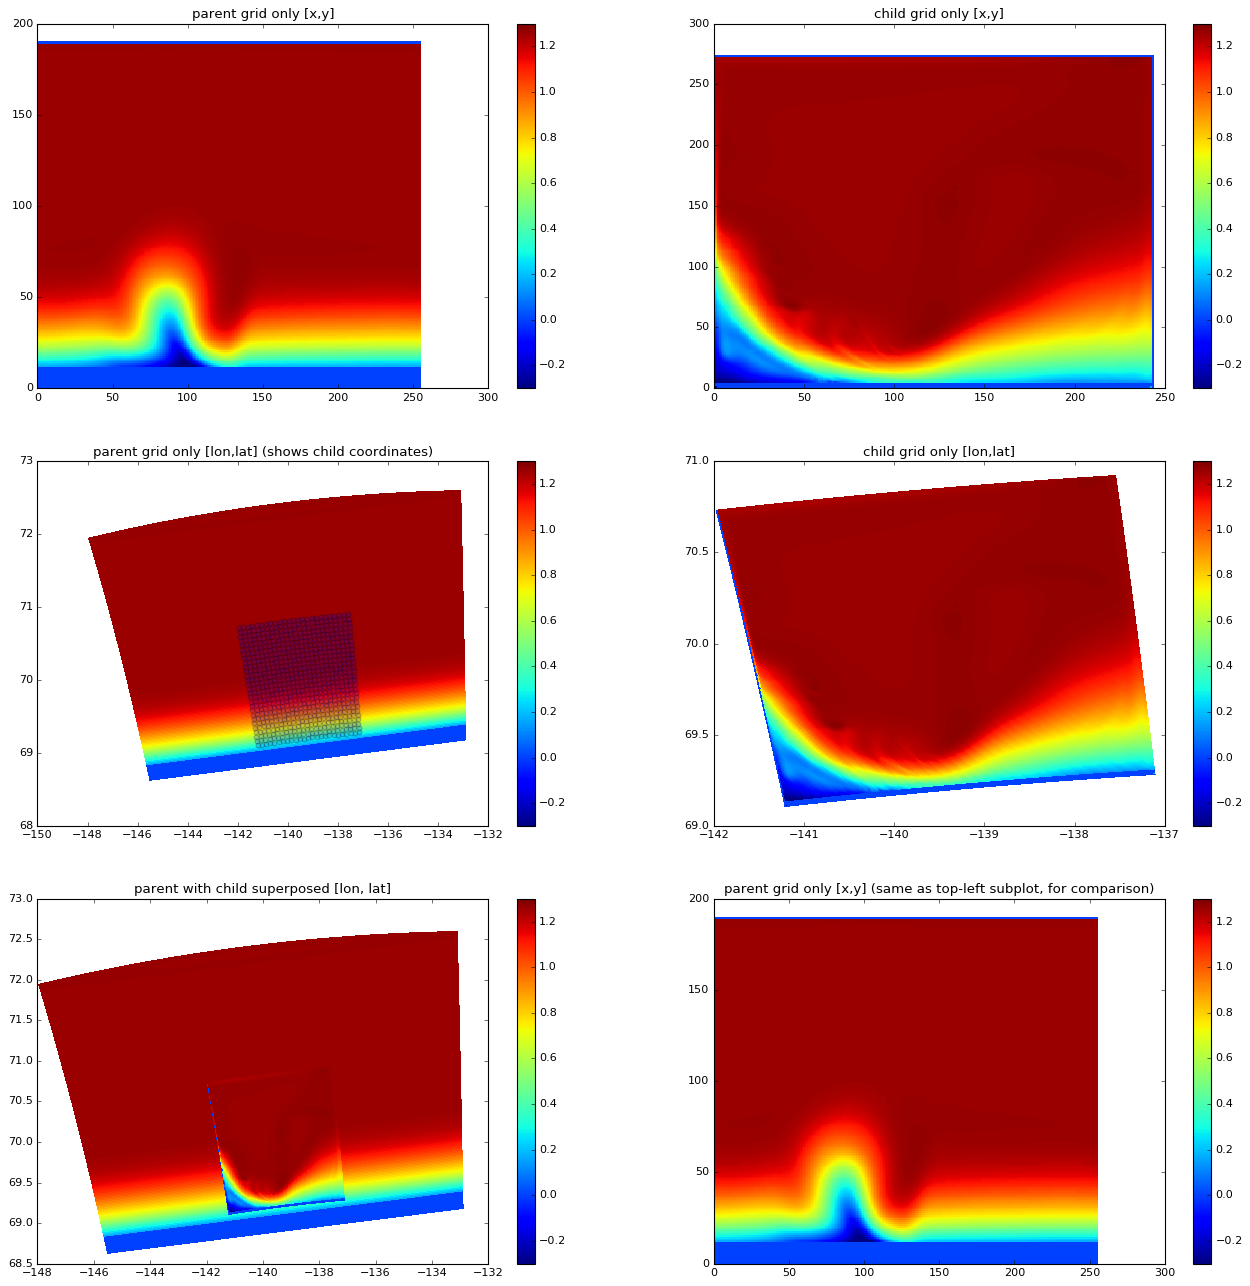

In [13]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20, 20))
vmin, vmax = -0.3, 1.3
p1 = ax1.pcolor(temp_parent, vmin=vmin, vmax=vmax)
p2 = ax2.pcolor(temp_child, vmin=vmin, vmax=vmax)
p3 = ax3.pcolor(nav_lon_parent, nav_lat_parent, temp_parent, vmin=vmin, vmax=vmax)
ax3.scatter(nav_lon_child[::10, ::10], nav_lat_child[::10, ::10], alpha=0.2)
p4 = ax4.pcolor(nav_lon_child, nav_lat_child, temp_child, vmin=vmin, vmax=vmax)
p5 = ax5.pcolor(nav_lon_parent, nav_lat_parent, temp_parent, vmin=vmin, vmax=vmax)
ax5.pcolor(nav_lon_child, nav_lat_child, temp_child, vmin=vmin, vmax=vmax)
p6 = ax6.pcolor(temp_parent, vmin=vmin, vmax=vmax)

ax1.set_title('parent grid only [x,y]')
ax2.set_title('child grid only [x,y]')
ax3.set_title('parent grid only [lon,lat] (shows child coordinates)')
ax4.set_title('child grid only [lon,lat]')
ax5.set_title('parent with child superposed [lon, lat]')
ax6.set_title('parent grid only [x,y] (same as top-left subplot, for comparison)')

for p, ax in zip([p1, p2, p3, p4, p5, p6], [ax1, ax2, ax3, ax4, ax5, ax6]):
    fig.colorbar(p, ax=ax)

# U velocity

Same thing here.

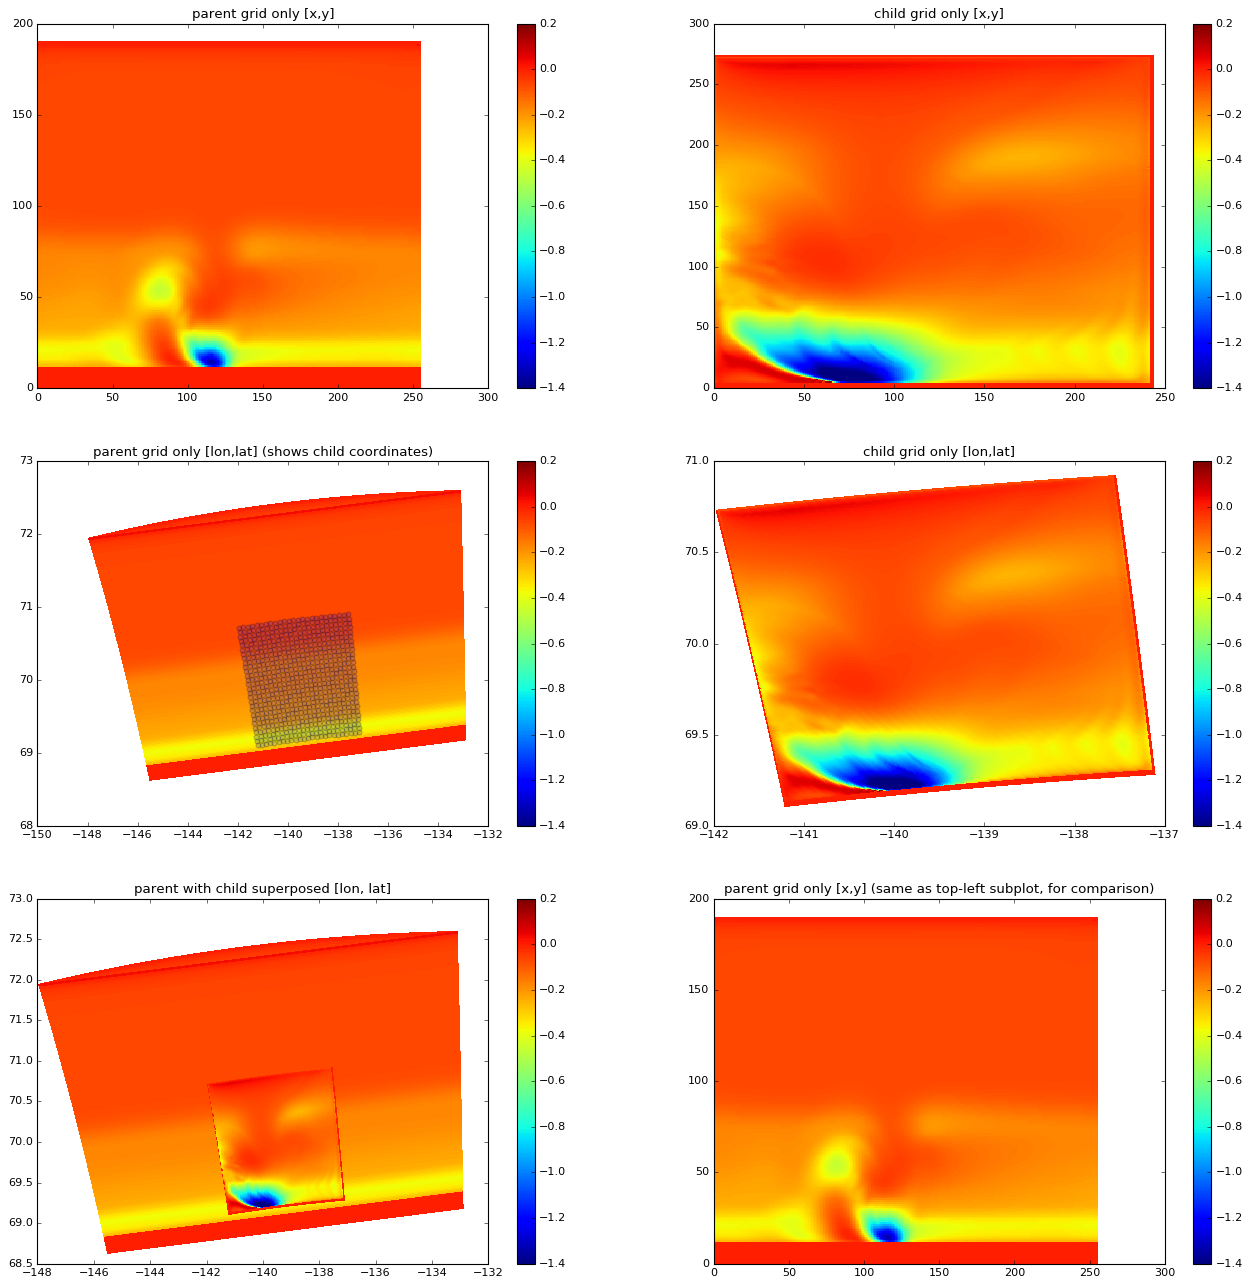

In [14]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20, 20))
vmin,vmax = -1.4,0.2
p1 = ax1.pcolor(u_parent, vmin=vmin, vmax=vmax)
p2 = ax2.pcolor(u_child, vmin=vmin, vmax=vmax)
p3 = ax3.pcolor(nav_lon_parent, nav_lat_parent, u_parent, vmin=vmin, vmax=vmax)
ax3.scatter(nav_lon_child[::10, ::10], nav_lat_child[::10, ::10], alpha=0.2)
p4 = ax4.pcolor(nav_lon_child, nav_lat_child, u_child, vmin=vmin, vmax=vmax)
p5 = ax5.pcolor(nav_lon_parent, nav_lat_parent, u_parent, vmin=vmin, vmax=vmax)
ax5.pcolor(nav_lon_child, nav_lat_child, u_child, vmin=vmin, vmax=vmax)
p6 = ax6.pcolor(u_parent, vmin=vmin, vmax=vmax)

ax1.set_title('parent grid only [x,y]')
ax2.set_title('child grid only [x,y]')
ax3.set_title('parent grid only [lon,lat] (shows child coordinates)')
ax4.set_title('child grid only [lon,lat]')
ax5.set_title('parent with child superposed [lon, lat]')
ax6.set_title('parent grid only [x,y] (same as top-left subplot, for comparison)')

for p, ax in zip([p1, p2, p3, p4, p5, p6], [ax1, ax2, ax3, ax4, ax5, ax6]):
    fig.colorbar(p, ax=ax)